In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder,OneHotEncoder
from sklearn import  preprocessing

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
import xgboost as xgb

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

/home/ali/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

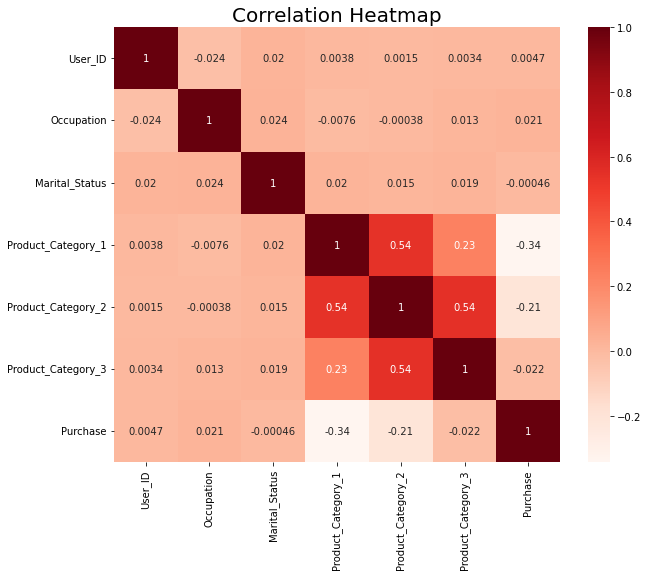

In [7]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),cmap = "Reds", annot = True)
plt.title("Correlation Heatmap", fontsize = 20);


<AxesSubplot:title={'center':'Purchase Distribution'}, ylabel='Frequency'>

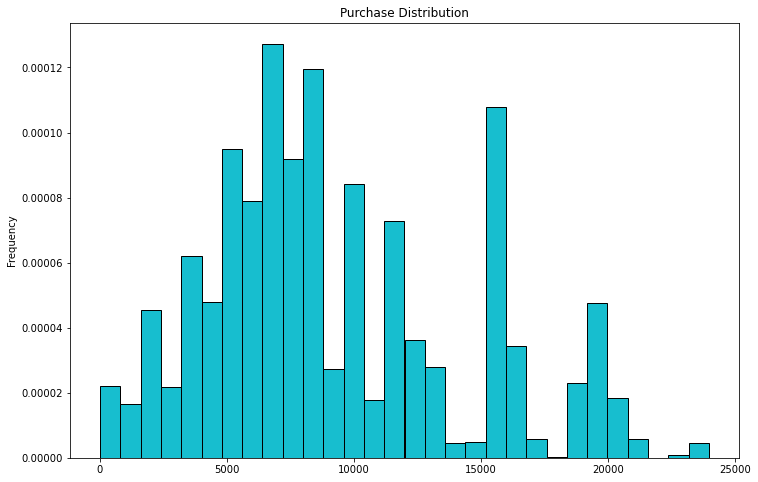

In [8]:
df['Purchase'].plot(kind='hist',edgecolor = 'black',color='tab:cyan',
                    density = 1,title='Purchase Distribution',bins=30, figsize=(12,8))

<AxesSubplot:xlabel='Purchase'>

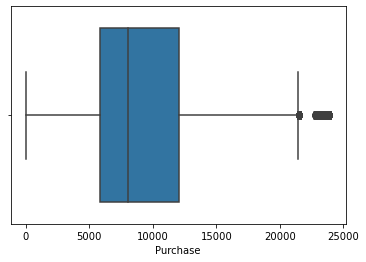

In [9]:
sns.boxplot(data=df, x="Purchase")

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

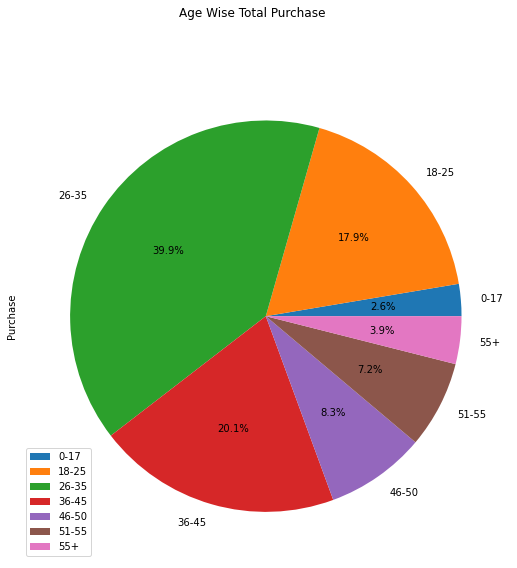

In [10]:
fig=df[['Age','Purchase']].groupby('Age').sum()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,9),title='Age Wise Total Purchase')

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

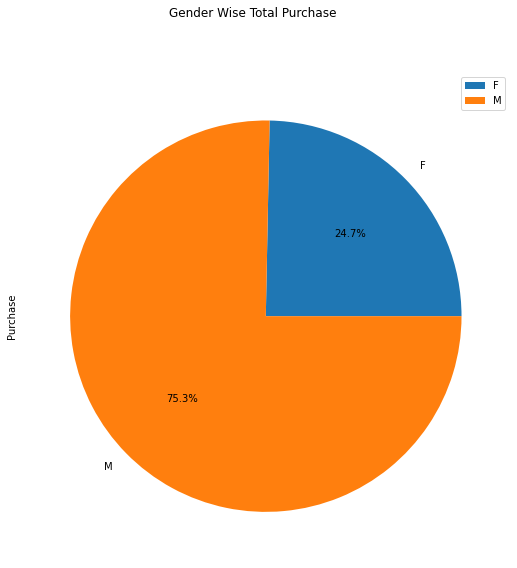

In [11]:
fig=df[['Gender','Purchase']].groupby('Gender').count()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,9),title='Gender Wise Total Purchase')

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

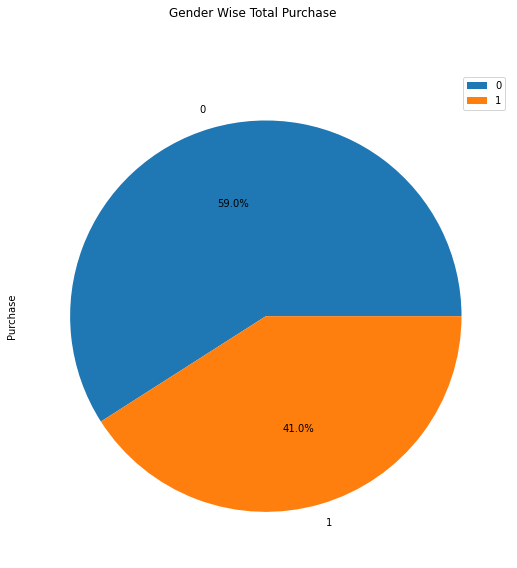

In [12]:
fig=df[['Marital_Status','Purchase']].groupby('Marital_Status').sum()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,9),title='Gender Wise Total Purchase')

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

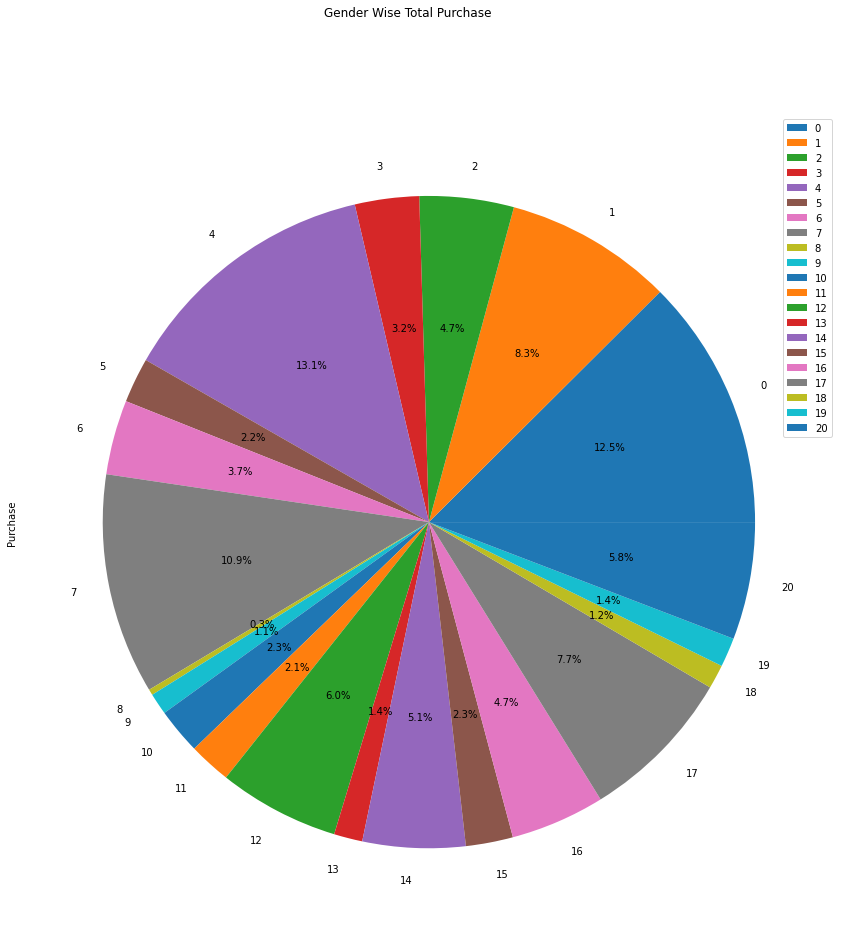

In [13]:
fig=df[['Occupation','Purchase']].groupby('Occupation').sum()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(23,15),title='Gender Wise Total Purchase')

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

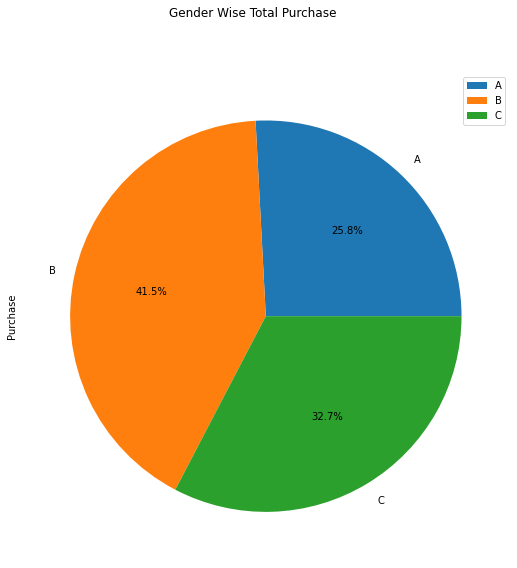

In [14]:
fig=df[['City_Category','Purchase']].groupby('City_Category').sum()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,9),title='Gender Wise Total Purchase')

array([<AxesSubplot:ylabel='Purchase'>], dtype=object)

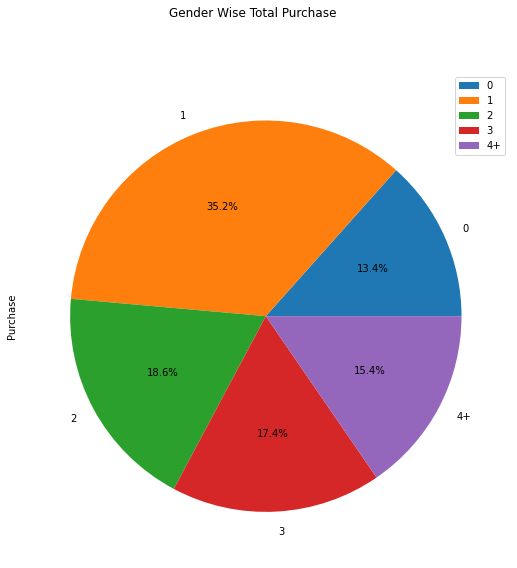

In [15]:
fig=df[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').sum()
fig.plot(kind='pie',autopct='%1.1f%%',subplots=True,figsize=(15,9),title='Gender Wise Total Purchase')

array([<AxesSubplot:title={'center':'Purchase'}, ylabel='Product_Category_3'>],
      dtype=object)

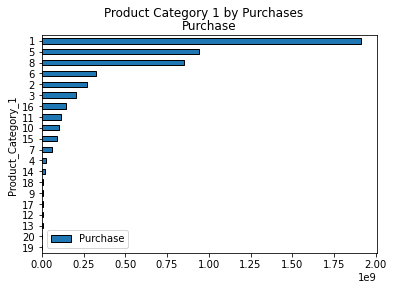

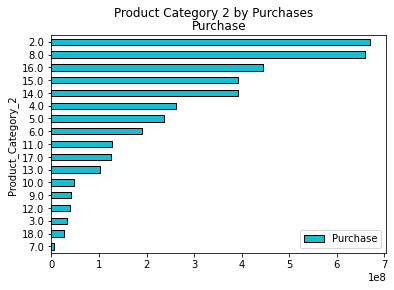

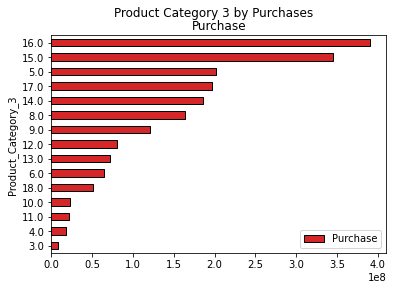

In [16]:
 
fig=df[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum()
fig= fig.sort_values(by='Purchase')
fig.plot(kind='barh',subplots=True,edgecolor = 'black',color='tab:blue',title='Product Category 1 by Purchases')

fig=df[['Product_Category_2','Purchase']].groupby('Product_Category_2').sum()
fig= fig.sort_values(by='Purchase')
fig.plot(kind='barh',subplots=True,edgecolor = 'black',color='tab:cyan',title='Product Category 2 by Purchases')

fig=df[['Product_Category_3','Purchase']].groupby('Product_Category_3').sum()
fig= fig.sort_values(by='Purchase')
fig.plot(kind='barh',subplots=True,edgecolor = 'black',color='tab:red',title='Product Category 3 by Purchases')

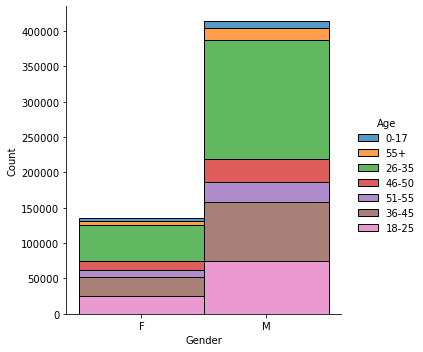

In [17]:
sns.displot(df, x="Gender", hue="Age", multiple="stack",)


Text(0.5, 1.0, 'Gender Distribution')

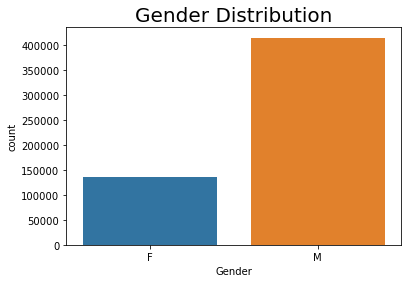

In [18]:
plot = sns.countplot(x ='Gender', data = df,)
plot.axes.set_title("Gender Distribution",fontsize=20)

Text(0.5, 1.0, 'Marital Status Distribution')

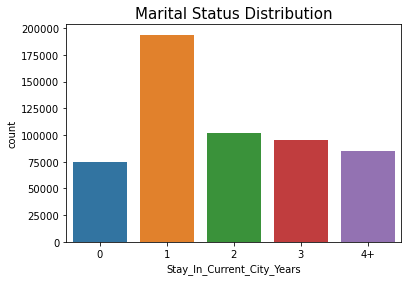

In [19]:
plot = sns.countplot(x ='Stay_In_Current_City_Years', data = df.sort_values(by= 'Stay_In_Current_City_Years'))
plot.axes.set_title("Marital Status Distribution",fontsize=15)

Text(0.5, 1.0, 'Marital Status Distribution')

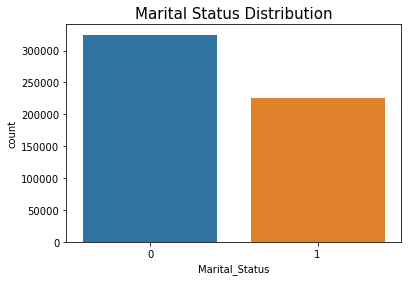

In [20]:
plot = sns.countplot(x ='Marital_Status', data = df)
plot.axes.set_title("Marital Status Distribution",fontsize=15)


<AxesSubplot:xlabel='Gender', ylabel='Age'>

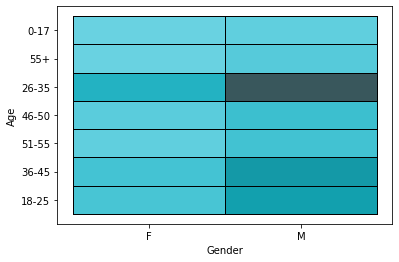

In [21]:
sns.histplot(data=df,x='Gender', y="Age",edgecolor = 'black',color='tab:cyan')

Text(0.5, 1.0, 'Age Distribution')

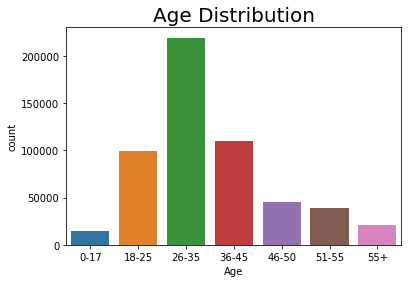

In [22]:
plot = sns.countplot(x ='Age', data = df.sort_values(by='Age'))
plot.axes.set_title("Age Distribution",fontsize=20)

In [23]:
print(df['Gender'].unique())
print(df['Age'].unique())
print(df['City_Category'].unique())
print(df['Stay_In_Current_City_Years'].unique())


['F' 'M']
['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
['A' 'C' 'B']
['2' '4+' '3' '1' '0']


In [24]:
df.Gender = df.Gender.replace(['F', 'M'], [0,1])
df.Age = df.Age.replace(['0-17' ,'55+' ,'26-35', '46-50' ,'51-55', '36-45' ,'18-25'], [0,6,2,4,5,3,1])
df.City_Category = df.City_Category.replace(['A', 'C', 'B'], [0,2,1])
df.Stay_In_Current_City_Years = df.Stay_In_Current_City_Years.replace(['2' ,'4+', '3', '1', '0'], [2,4,3,1,0])
df['Product_ID']=pd.factorize(df.Product_ID)[0]
df['User_ID']=pd.factorize(df.User_ID)[0]
df['Product_Category_1']=pd.factorize(df.Product_Category_1)[0]
df['Product_Category_2']=pd.factorize(df.Product_Category_2)[0]
df['Product_Category_3']=pd.factorize(df.Product_Category_3)[0]


In [25]:
df.Gender=df.Gender.astype("int64")
df.Age=df.Age.astype("int64")
df.City_Category=df.City_Category.astype("int64")
df.Stay_In_Current_City_Years=df.Stay_In_Current_City_Years.astype("int64")

In [43]:
X = df.drop("Purchase", axis = 1)
y = df["Purchase"]

In [44]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')
s1=StandardScaler()
m1=MinMaxScaler()

ct=ColumnTransformer(
                    [
#                         ('cat_encoder',oh,make_column_selector(dtype_include='object')),
#                         ('StandardScaler',s1,make_column_selector(dtype_include='object')),
                        ('Numerical Scaler',m1,make_column_selector(dtype_exclude='object')),  
                    ]
                    ,remainder='passthrough')
X=ct.fit_transform(X)

In [45]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,10
0,0.000000,0.000000,0.0,0.000000,0.50,0.0,0.50,0.0,0.000000,0.000000,0.000000
1,0.000000,0.000275,0.0,0.000000,0.50,0.0,0.50,0.0,0.052632,0.058824,0.066667
2,0.000000,0.000551,0.0,0.000000,0.50,0.0,0.50,0.0,0.105263,0.000000,0.000000
3,0.000000,0.000826,0.0,0.000000,0.50,0.0,0.50,0.0,0.105263,0.117647,0.000000
4,0.000170,0.001102,1.0,1.000000,0.80,1.0,1.00,0.0,0.157895,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
550063,0.904075,0.999174,1.0,0.833333,0.65,0.5,0.25,1.0,0.947368,0.000000,0.000000
550064,0.904414,0.998898,0.0,0.333333,0.05,1.0,0.75,0.0,0.947368,0.000000,0.000000
550065,0.904584,0.998898,0.0,0.333333,0.75,0.5,1.00,1.0,0.947368,0.000000,0.000000
550066,0.997963,0.998898,0.0,1.000000,0.05,1.0,0.50,0.0,0.947368,0.000000,0.000000


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=0)

In [70]:
lr = LinearRegression(n_jobs=-1)
svr = SVR(max_iter=2000)
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor(n_neighbors=9,n_jobs=-1)
rfr = RandomForestRegressor(n_jobs=-1,n_estimators=100,oob_score=True)
abr = AdaBoostRegressor(n_estimators=500,learning_rate=.7)
sr =SGDRegressor()
cbr = CatBoostRegressor(iterations=2500, learning_rate=1,depth=16,eval_metric='MAE', verbose=150,task_type='GPU')
xg_reg  =xgb.XGBRFRegressor(colsample_bynode=.99,max_depth=15,min_child_weight= 11,alpha= 5.6353429991712695e-08,
    subsample= 0.99,
    colsample_bytree= 0.99,gamma= 1,
                            n_estimators=1000,n_jobs=-1,random_state=23,grow_policy= 'depthwise')

reg_list=[lr,svr,dtr,knnr,rfr,abr,sr, cbr,xg_reg]

In [71]:
%%time

counter=1
for reg in reg_list:
    reg.fit(X_train,y_train.values.ravel())
    print(f"Fitting {counter} done")
    counter+=1
#


Fitting 1 done
CPU times: user 31.3 s, sys: 503 ms, total: 31.8 s
Wall time: 31.8 s


In [72]:
%%time
score_dict={}

for reg in reg_list:
    
    reg_name = reg.__class__.__name__
    
    pred=reg.predict(X_test)
    
    print("-"*50)
    
    print(reg_name)
    
    print(f"R2 Score : {r2_score(y_test,pred)}")
    print(f"Mean Absolute Error Score : {mean_absolute_error(y_test,pred)}")
    print(f"Mean Squared Error Score :{mean_squared_error(y_test,pred)}")
    
    
    score_dict[reg_name]={
        "R2 Score":r2_score(y_test,pred),
        "Mean Absolute Error Score":mean_absolute_error(y_test,pred),
        "Mean Squared Error Score" :mean_squared_error(y_test,pred),
    }

--------------------------------------------------
AdaBoostRegressor
R2 Score : 0.5126672634459611
Mean Absolute Error Score : 2735.9214998759735
Mean Squared Error Score :12308605.638957087
CPU times: user 437 ms, sys: 91.7 ms, total: 528 ms
Wall time: 528 ms


In [50]:
score_pd=pd.DataFrame(score_dict).transpose().sort_values("R2 Score",ascending=False)
score_pd


,R2 Score,Mean Absolute Error Score,Mean Squared Error Score
RandomForestRegressor,0.703850,2017.983072,7.479890e+06
AdaBoostRegressor,0.493388,2809.145211,1.279555e+07
DecisionTreeRegressor,0.434973,2655.306842,1.427094e+07
KNeighborsRegressor,0.406019,2882.239984,1.500224e+07
LinearRegression,0.119656,3684.432448,2.223492e+07
SGDRegressor,0.119423,3674.563907,2.224082e+07
